# Finite Difference Methods

## 二阶导数估计

In [1]:
import sympy as sp
def removeSub(expr):
    if isinstance(expr, sp.Subs):
        return expr.args[0].replace(expr.args[1][0], expr.args[2][0])
    for arg in expr.args:
        expr = expr.replace(arg, removeSub(arg))
    return expr

def getDeviationEstimator(steps=[-1, 0, 1], k=2, verbose=False):
    N = len(steps)
    h, x, x0, dx = sp.symbols('h x, x_0, \Delta{x}')
    u = sp.Function('u')

    left = u(x).diff(x, k)
    right = 0
    for idx, step in enumerate(steps):
        tmp_param = sp.symbols(chr(ord('A') + idx))
        right += tmp_param * u(x + step*h)

    if verbose:
        display(sp.Eq(left, right))

    u_taylor = removeSub(u(x).series(x, x0, N).subs(x, x0+dx)).subs(x0, x)
    taylors_dict = {}
    for step in steps:
        tmp = u_taylor.subs(dx, step*h)
        taylors_dict[u(x+step*h)] = tmp
        if step != 0 and verbose:
            display(sp.Eq(u(x+step*h), tmp))
    
    right_taylor = right.xreplace(taylors_dict).expand()
    equ_taylor = right_taylor - left

    line_eqs = []
    for idx in range(N):
        tmp = equ_taylor.coeff(u(x).diff(x, idx))
        if verbose:
            display(tmp)
        line_eqs.append(tmp)
    params = line_eqs[0].args
    solution = sp.linsolve(line_eqs, params)

    param_dict = {}
    for param, k in zip(params, solution.args[0]):
        param_dict[param] = k
    residual = equ_taylor.xreplace(param_dict)
    if verbose:
        display(residual)

    result = 0
    for step, k in zip(steps, solution.args[0]):
        result += u(x+step*h) * k
    if verbose:
        display(sp.Eq(left, result.simplify()))
    return result

In [2]:
estimator1 = getDeviationEstimator([-1, 0, 1])
display(estimator1)
estimator2 = getDeviationEstimator([0, 1, 2])
display(estimator2)
estimator3 = getDeviationEstimator([-2, -1, 0])
display(estimator3)

-2*u(x)/h**2 + u(-h + x)/h**2 + u(h + x)/h**2

u(x)/h**2 - 2*u(h + x)/h**2 + u(2*h + x)/h**2

u(x)/h**2 + u(-2*h + x)/h**2 - 2*u(-h + x)/h**2

In [3]:
estimator1 = getDeviationEstimator([-2, -1, 0, 1, 2])
display(estimator1)
estimator2 = getDeviationEstimator([-1, 0, 1, 2, 3])
display(estimator2)
estimator3 = getDeviationEstimator([0, 1, 2, 3, 4])
display(estimator3)
estimator4 = getDeviationEstimator([-3, -2, -1, 0, 1])
display(estimator4)
estimator5 = getDeviationEstimator([-4, -3, -2, -1, 0])
display(estimator5)

-5*u(x)/(2*h**2) - u(-2*h + x)/(12*h**2) + 4*u(-h + x)/(3*h**2) + 4*u(h + x)/(3*h**2) - u(2*h + x)/(12*h**2)

-5*u(x)/(3*h**2) + 11*u(-h + x)/(12*h**2) + u(h + x)/(2*h**2) + u(2*h + x)/(3*h**2) - u(3*h + x)/(12*h**2)

35*u(x)/(12*h**2) - 26*u(h + x)/(3*h**2) + 19*u(2*h + x)/(2*h**2) - 14*u(3*h + x)/(3*h**2) + 11*u(4*h + x)/(12*h**2)

-5*u(x)/(3*h**2) - u(-3*h + x)/(12*h**2) + u(-2*h + x)/(3*h**2) + u(-h + x)/(2*h**2) + 11*u(h + x)/(12*h**2)

35*u(x)/(12*h**2) + 11*u(-4*h + x)/(12*h**2) - 14*u(-3*h + x)/(3*h**2) + 19*u(-2*h + x)/(2*h**2) - 26*u(-h + x)/(3*h**2)

In [4]:
estimator1 = getDeviationEstimator([-1, 0, 1], k=1)
display(estimator1)
estimator2 = getDeviationEstimator([0, 1, 2], k=1)
display(estimator2)
estimator3 = getDeviationEstimator([-2, -1, 0], k=1)
display(estimator3)

-u(-h + x)/(2*h) + u(h + x)/(2*h)

-3*u(x)/(2*h) + 2*u(h + x)/h - u(2*h + x)/(2*h)

3*u(x)/(2*h) + u(-2*h + x)/(2*h) - 2*u(-h + x)/h

In [5]:
estimator1 = getDeviationEstimator([0, 1, 2, 3, 4], k=1)
display(estimator1)
estimator2 = getDeviationEstimator([-1, 0, 1, 2, 3], k=1)
display(estimator2)
estimator3 = getDeviationEstimator([-2, -1, 0, 1, 2], k=1)
display(estimator3)
estimator4 = getDeviationEstimator([-3, -2, -1, 0, 1], k=1)
display(estimator4)
estimator5 = getDeviationEstimator([-4, -3, -2, -1, 0], k=1)
display(estimator5)

-25*u(x)/(12*h) + 4*u(h + x)/h - 3*u(2*h + x)/h + 4*u(3*h + x)/(3*h) - u(4*h + x)/(4*h)

-5*u(x)/(6*h) - u(-h + x)/(4*h) + 3*u(h + x)/(2*h) - u(2*h + x)/(2*h) + u(3*h + x)/(12*h)

u(-2*h + x)/(12*h) - 2*u(-h + x)/(3*h) + 2*u(h + x)/(3*h) - u(2*h + x)/(12*h)

5*u(x)/(6*h) - u(-3*h + x)/(12*h) + u(-2*h + x)/(2*h) - 3*u(-h + x)/(2*h) + u(h + x)/(4*h)

25*u(x)/(12*h) + u(-4*h + x)/(4*h) - 4*u(-3*h + x)/(3*h) + 3*u(-2*h + x)/h - 4*u(-h + x)/h

In [6]:
def getDeviationEstimatorCoeff(steps=[-1, 0, 1]):
    u = sp.Function('u')
    x, h = sp.symbols('x, h')
    estimator = getDeviationEstimator(steps)
    coeff = []
    for step in steps:
        coeff.append(estimator.coeff(u(x + step*h)/h**2).evalf())
    return coeff
coeff = getDeviationEstimatorCoeff()
coeff

[1.00000000000000, -2.00000000000000, 1.00000000000000]

In [7]:
import numpy as np

def getAB(N=5, NX=10, NY=10):
    a = np.arange(N).reshape((1, -1))
    steps_arr = a - a.T
    coeff_arr = []
    for steps in steps_arr:
        coeff = getDeviationEstimatorCoeff(steps)
        coeff_arr.append(coeff)
    coeff_arr = np.array(coeff_arr, dtype=np.float64)

    def getDevEstMatrix(NX):
        coeff_idx_arr = (N-1)//2 * np.ones(NX)
        coeff_idx_arr[:(N-1)//2] = np.arange((N-1)//2)
        coeff_idx_arr[-(N-1)//2:] = np.arange((N+1)//2, N)
        coeff_idx_arr = coeff_idx_arr.astype(int)
        A = np.zeros((NX, NX))
        for idx, coeff_idx in enumerate(coeff_idx_arr):
            A[idx, idx-coeff_idx:idx+N-coeff_idx] = coeff_arr[coeff_idx]
        return A
    A = getDevEstMatrix(NY)
    B = getDevEstMatrix(NX).T
    return A, B
A, B = getAB(N=3, NX=5, NY=5)
print(A)
print(B)

[[ 1. -2.  1.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  1. -2.  1.]]
[[ 1.  1.  0.  0.  0.]
 [-2. -2.  1.  0.  0.]
 [ 1.  1. -2.  1.  1.]
 [ 0.  0.  1. -2. -2.]
 [ 0.  0.  0.  1.  1.]]


## Finite Difference Method

$$
\frac{\partial^2 u(x, y)}{\partial x^2} + \frac{\partial^2 u(x, y)}{\partial y^2} = C(x, y)
$$

$$
\frac{\partial^2 u(x, y)}{\partial x^2} = AU,
\frac{\partial^2 u(x, y)}{\partial y^2} = UB
$$


https://math.stackexchange.com/questions/186598/how-to-solve-matrix-equation-axxb-c-for-x
$$
\begin{aligned}
&AU + UB = C \\
&(I^T_B \otimes A) vec(U) + (B^T \otimes I_A) vec(U) = vec(C) \\
&(I^T_B \otimes A + B^T \otimes I_A) vec(U) = vec(C) \\
&vec(U) = (I^T_B \otimes A + B^T \otimes I_A)^{-1} vec(C)
\end{aligned}
$$

$$
0 < x < 1, 0 < y < 1.
$$

$$
D = \begin{bmatrix}
0 & 0 & \dots & 0 & 0 \\
0 & 1 & \dots & 0 & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & 1 & 0 \\
0 & 0 & \dots & 0 & 0 \\
\end{bmatrix}
$$

For some boundary condition $U_0$, we have

$$
\begin{cases}
U - D_A U D_B = U_0 - D_A U_0 D_B \\
D_AAUD_B + D_A U B D_B = D_A C D_B\\
\end{cases}
$$

$$
\begin{cases}
[I_B \otimes I_A - D_B^T \otimes D_A] \cdot vec(U) = vec(U_0 - D_A U_0 D_B) \\
[D_B^T \otimes (D_AA) + (BD_B)^T \otimes D_A] \cdot vec(U) = vec(D_A C D_B)\\
\end{cases}
$$

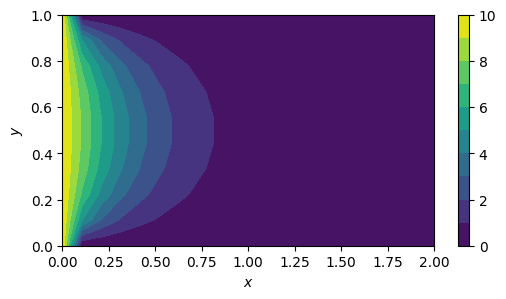

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def runFinitDifferenceMethod(N=3, NX=20, NY=10):
    xrange = np.linspace(0, 2.0, NX)
    yrange = np.linspace(0, 1.0, NY)
    dx = xrange[1]-xrange[0]
    dy = yrange[1]-yrange[0]
    X, Y = np.meshgrid(xrange, yrange)
    C = np.zeros_like(X)
    A, B = getAB(N, NX, NY)
    A /= dy**2
    B /= dx**2

    IA, DA, IB, DB = np.eye(NY), np.eye(NY), np.eye(NX), np.eye(NX)
    DA[0][0], DA[-1][-1], DB[0][0], DB[-1][-1] = 0, 0, 0, 1
    U0 = np.zeros_like(X)
    U0[:, 0] = 10

    K1 = np.kron(IB, IA) - np.kron(DB.T, DA)
    K2 = np.kron(DB.T, DA @ A) + np.kron((B @ DB).T, DA)
    C1 = U0 - DA @ U0 @ DB
    C2 = DA @ C @ DB
    C1_vec = C1.T.reshape(-1)
    C2_vec = C2.T.reshape(-1)
    C_vec = C1_vec + C2_vec
    K = K1 + K2
    U_vec = np.linalg.inv(K) @ C_vec
    U = U_vec.reshape((NX, -1)).T
    return U

def plotU(U):
    NX = U.shape[1]
    NY = U.shape[0]
    xrange = np.linspace(0, 2.0, NX)
    yrange = np.linspace(0, 1.0, NY)
    dx = xrange[1]-xrange[0]
    dy = yrange[1]-yrange[0]
    X, Y = np.meshgrid(xrange, yrange)
    plt.rcParams['figure.figsize'] = 6, 3
    plt.contourf(X.T, Y.T, U.T, 10)
    plt.colorbar()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

U = runFinitDifferenceMethod(3, 20, 10)
plotU(U)

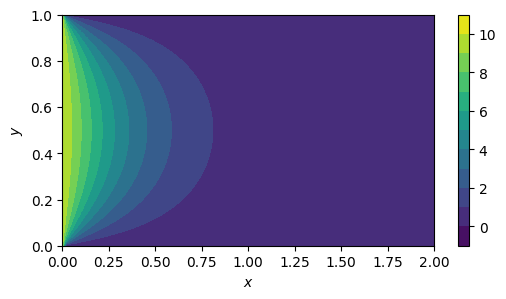

In [9]:
N, NX, NY = 5, 100, 100
U = runFinitDifferenceMethod(N, NX, NY)
plotU(U)

In [10]:
NY, NX = 5, 4
IA, DA = np.eye(NY), np.eye(NY)
DA[0][0], DA[-1][-1] = 0, 0
IB, DB = np.eye(NX), np.eye(NX)
DB[0][0], DB[-1][-1] = 0, 1
C = np.random.randn(NY, NX)
display(DA, DB, C, DA @ C @ DB, C - DA @ C @ DB)

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

array([[ 0.37040525, -0.68011563, -1.07456394,  2.03584458],
       [ 1.26483766, -1.26418632, -0.38430087, -0.98268573],
       [-1.61966331,  0.08911528,  0.48449128, -1.29157204],
       [ 0.06854995,  0.22642158,  1.51892589, -0.75226202],
       [ 0.23114794, -2.62695702,  0.38198424,  0.19528542]])

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.26418632, -0.38430087, -0.98268573],
       [ 0.        ,  0.08911528,  0.48449128, -1.29157204],
       [ 0.        ,  0.22642158,  1.51892589, -0.75226202],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

array([[ 0.37040525, -0.68011563, -1.07456394,  2.03584458],
       [ 1.26483766,  0.        ,  0.        ,  0.        ],
       [-1.61966331,  0.        ,  0.        ,  0.        ],
       [ 0.06854995,  0.        ,  0.        ,  0.        ],
       [ 0.23114794, -2.62695702,  0.38198424,  0.19528542]])